# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

__Формула прямоугольников:__

$ y_{n+1} = y_n + s_{n+\frac 1 2}, y_0 = 0 $

__Формула трапеций:__

$ y_{n+1} = y_n + \frac 1 2 (s_n + s_{n+1}), y_0 = 0 $

__Формула Симпсона:__

$ y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}), y_0 = 0 $

__Правило 3/8:__

$ y_{n+2} = y_{n-1} + \frac 1 8(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1}) $

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Пункт 1.

Вывод формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.

- Формула прямоугольников: 

$ y_{n+1} = y_n + s_{n+\frac 1 2}, y_0 = 0 $

Пусть $s_n = e^{i \omega n} $ и $ y_n = H(\omega)e^{i \omega n} $, тогда:

$ \begin{cases}
    y_{n+1} = H(\omega)e^{i \omega n} + e^{i \omega (n+ \frac 1 2)} \\
    y_{n+1} = H(\omega)e^{i \omega (n+1)}
\end{cases} $

Приравняем правые части:

$ H(\omega)e^{i \omega n} + e^{i \omega (n+ \frac 1 2)} = H(\omega)e^{i \omega (n+1)} $

$ H(\omega)e^{i \omega n}(1 - e^{i \omega}) = - e^{i \omega (n + \frac 1 2)} $

$ H(\omega)(e^{i \omega} - 1) = e^{\frac 1 2 i \omega} $

$ H(\omega) = \frac {e^{\frac 1 2 i \omega}} {e^{i \omega} - 1}  = \frac 1 {e^{\frac 1 2 i \omega} - e^{-\frac 1 2 i \omega}} = \frac 1 {2isin(\frac \omega 2)}$

$ H(\omega) = H(2\pi f) = \tilde H(f) $

$ \tilde H(f) = \frac 1 {2i\sin(\pi f)} $

Отношение значений:

$ \gamma =\frac {Вычисленное} {Точное} = \frac {\frac \omega 2} {\sin(\frac \omega 2)} = 1 + \frac {\omega^2} {24} + \frac {7\omega^4} {5760} + ... $

$\gamma = \frac {Вычисленное} {Точное} = \frac {\pi f} {\sin(\pi f)} = 1 + \frac {\pi^2 f^2} 6 + \frac {7\pi^4 f^4} {360} + ...$

- Формула трапеций: 

$ y_{n+1} = y_n + \frac 1 2 (s_n + s_{n+1}), y_0 = 0 $

Пусть $s_n = e^{i \omega n} $ и $ y_n = H(\omega)e^{i \omega n} $, тогда:

$ \begin{cases}
    y_{n+1} = H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega (n+1)}) \\
    y_{n+1} = H(\omega)e^{i \omega (n+1)}
\end{cases} $

Приравняем правые части:

$ H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega (n+1)}) = H(\omega)e^{i \omega (n+1)} $

$ H(\omega)e^{i \omega n}(1 - e^{i \omega}) = - \frac 1 2 (e^{i \omega n} + e^{i \omega (n+1)})$

$ H(\omega)(e^{i \omega} - 1) = \frac 1 2 (1+e^{i \omega}) $

$ H(\omega) = \frac {\frac 1 2 (1+e^{i \omega})} {e^{i \omega} - 1}  = \frac {cos(\frac \omega 2)} {2isin(\frac \omega 2)}$

$ H(\omega) = H(2\pi f) = \tilde H(f) $

$ \tilde H(f) = \frac {cos(\pi f)} {2isin(\pi f)}$

Отношение значений:

$ \gamma =\frac {Вычисленное} {Точное} = cos(\frac \omega 2) \frac {\frac \omega 2} {\sin(\frac \omega 2)} = 1 - \frac {\omega^2} {12} + \frac {\omega^4} {720} + ... $

$\gamma = \frac {Вычисленное} {Точное} = cos(\pi f) \frac {\pi f} {\sin(\pi f)} = 1 - \frac {\pi^2 f^2} 3 + \frac {\pi^4 f^4} {45} + ...$

- Формула Симпсона: 

$ y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}), y_0 = 0 $

Пусть $s_n = e^{i \omega n} $ и $ y_n = H(\omega)e^{i \omega n} $, тогда:

$ \begin{cases}
    y_{n+1} = H(\omega)e^{i \omega (n-1)} + \frac 1 3 (e^{i \omega (n-1)} +4e^{i \omega n} + e^{i \omega (n+1)}) \\
    y_{n+1} = H(\omega)e^{i \omega (n+1)}
\end{cases} $

Приравняем правые части:

$ H(\omega)e^{i \omega (n-1)} + \frac 1 3 (e^{i \omega (n-1)} +4e^{i \omega n} + e^{i \omega (n+1)}) = H(\omega)e^{i \omega (n+1)} $

$ H(\omega)e^{i \omega n}(e^{-i \omega} - e^{i \omega}) = - \frac 1 3 (e^{i \omega (n-1)} +4e^{i \omega n} + e^{i \omega (n+1)})$

$ H(\omega)(e^{i \omega} - e^{-i \omega}) = \frac 1 3 (e^{-i \omega} + 4 + e^{i \omega}) $

$ H(\omega) = \frac {\frac 1 3 (e^{-i \omega} + 4 + e^{i \omega})} {e^{i \omega} - e^{-i \omega}}  = \frac {cos(\omega) + 2} {3isin(\omega)}$

$ H(\omega) = H(2\pi f) = \tilde H(f) $

$ \tilde H(f) = \frac {cos(2\pi f) + 2} {3isin(2\pi f)}$

Отношение значений:

$ \gamma =\frac {Вычисленное} {Точное} = \frac {\omega(2 + cos(\omega))} {3sin(\omega)} = 1 + \frac {\omega^4} {180} + ... $

$\gamma = \frac {Вычисленное} {Точное} = \frac {(2\pi f)(2 + cos(2\pi f))} {3sin(2\pi f)} = 1 + \frac {4\pi^4 f^4} {45} + ...$

Построим графики передаточных функций и графики отношения, вычисляемого в результате фильтрации значения к истинному:

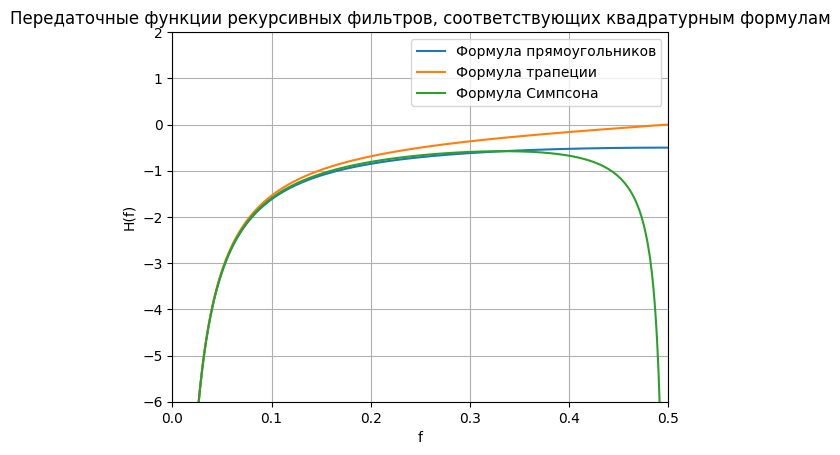

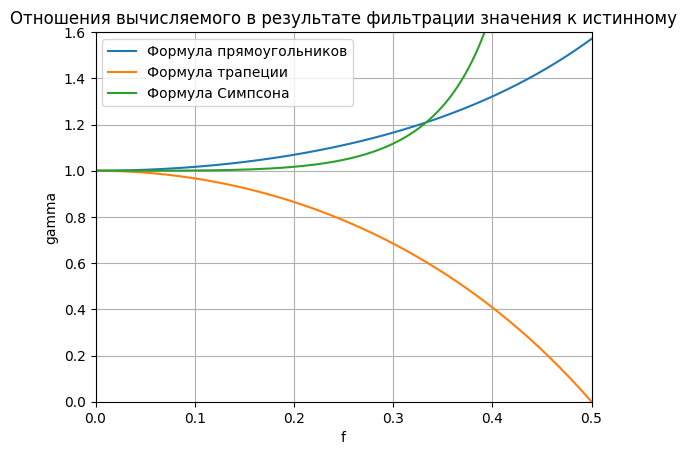

In [44]:
# формула прямоугольников
def tilde_H_1(f):
    return (1 / (2j*np.sin(math.pi*f))).imag

def gamma_1(f):
    return (math.pi*f) / (np.sin(math.pi*f))

# формула трапеций
def tilde_H_2(f):
    return (np.cos(math.pi*f) / (2j*np.sin(math.pi*f))).imag

def gamma_2(f):
    return np.cos(math.pi*f) * (math.pi*f) / (np.sin(math.pi*f))

# формула Симпсона
def tilde_H_3(f):
    return ((np.cos(2*math.pi*f) + 2) / (3j*np.sin(2*math.pi*f))).imag

def gamma_3(f):
    return (2*math.pi*f) * (2+ np.cos(2*math.pi*f)) / (3*np.sin(2*math.pi*f))

f = np.linspace(0.0001, 0.5, 500)

plt.plot(f, tilde_H_1(f), label='Формула прямоугольников')
plt.plot(f, tilde_H_2(f), label='Формула трапеции')
plt.plot(f, tilde_H_3(f), label='Формула Симпсона')
plt.title('Передаточные функции рекурсивных фильтров, соответствующих квадратурным формулам')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.axis((0, 0.5, -6, 2))
plt.legend()
plt.grid()
plt.show()

plt.plot(f, gamma_1(f), label='Формула прямоугольников')
plt.plot(f, gamma_2(f), label='Формула трапеции')
plt.plot(f, gamma_3(f), label='Формула Симпсона')
plt.title('Отношения вычисляемого в результате фильтрации значения к истинному')
plt.xlabel('f')
plt.ylabel('gamma')
plt.axis((0, 0.5, 0, 1.6))
plt.legend()
plt.grid()
plt.show()

По результатам графиков видно, что при использовании формулы трапеции высокие частоты подавляются. А в результате использования формул прямоугольников и Симпсона высокие частоты, наоборот, усиливаются.

### Пункт 2

Вывод формулы для передаточной функции рекурсивного фильтра для интегрирования "по правилу 3/8": 

$ y_{n+2} = y_{n-1} + \frac 1 8 (s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1}) $

Пусть $s_n = e^{i \omega n} $ и $ y_n = H(\omega)e^{i \omega n} $, тогда:

$ \begin{cases}
    y_{n+2} = H(\omega)e^{i \omega (n-1)} + \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n-1)}) \\
    y_{n+2} = H(\omega)e^{i \omega (n+2)}
\end{cases} $

Приравняем правые части:

$ H(\omega)e^{i \omega (n-1)} + \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n-1)}) = H(\omega)e^{i \omega (n+2)} $

$ H(\omega)e^{i \omega n}(e^{-i \omega} - e^{2i \omega}) = - \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n-1)}) $

$ H(\omega)(e^{2i \omega} - e^{-i \omega}) = \frac 1 8 (e^{2i \omega} + 3e^{i \omega} + 3 + e^{-i \omega}) $

$ H(\omega)e^{\frac {-i \omega} 2}(e^{\frac {3i \omega} 2} - e^{\frac {-3i \omega} 2}) = \frac 1 8 e^{\frac {-i \omega} 2} (e^{\frac {3i \omega} 2}+ 3e^{\frac {i \omega} 2} + 3e^{\frac {-i \omega} 2} + e^{\frac {-3i \omega} 2}) $

$ H(\omega) = \frac {e^{\frac {3i \omega} 2}+ 3e^{\frac {i \omega} 2} + 3e^{\frac {-i \omega} 2} + e^{\frac {-3i \omega} 2}} {8(e^{\frac {3i \omega} 2} - e^{\frac {-3i \omega} 2})} = \frac {2cos(\frac {3 \omega} 2) + 6cos(\frac \omega 2)} {16isin(\frac {3 \omega} 2)} = \frac {cos(\frac {3 \omega} 2) + 3cos(\frac \omega 2)} {8isin(\frac {3 \omega} 2)}$

$ H(\omega) = H(2\pi f) = \tilde H(f) $

$ \tilde H(f) = \frac {cos(3 \pi f) + 3cos(\pi f)} {8isin(3 \pi f)} $

Отношение значений:

$ \gamma =\frac {Вычисленное} {Точное} = \frac 1 {12} (cos(\frac {3\omega} 2) + 3cos(\frac \omega 2)) \frac {\frac {3\omega} 2} {sin(\frac {3\omega} 2)} = \frac 1 3 + \frac {\omega^4} {240} + ... $

$\gamma = \frac {Вычисленное} {Точное} = \frac 1 {12} (cos(3\pi f) + 3cos(\pi f)) \frac {3\pi f} {sin(3\pi f)} = \frac 1 3 + \frac {\pi^4 f^4} {15} + ... $

Построим графики передаточной функции и отношения, вычисляемого в результате фильтрации значения к истинному:


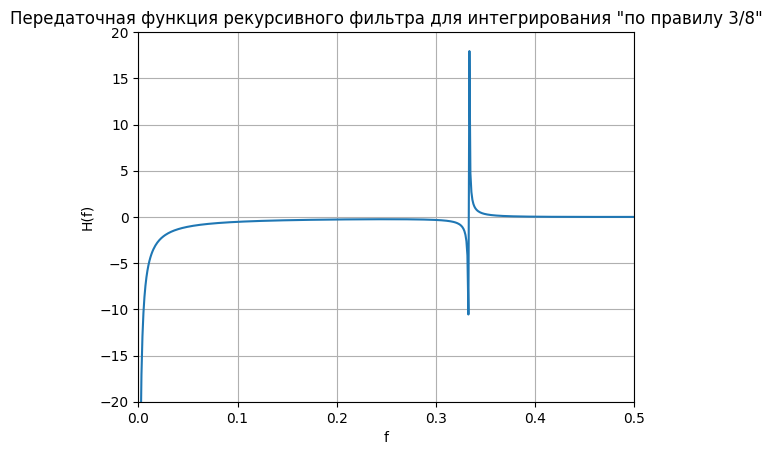

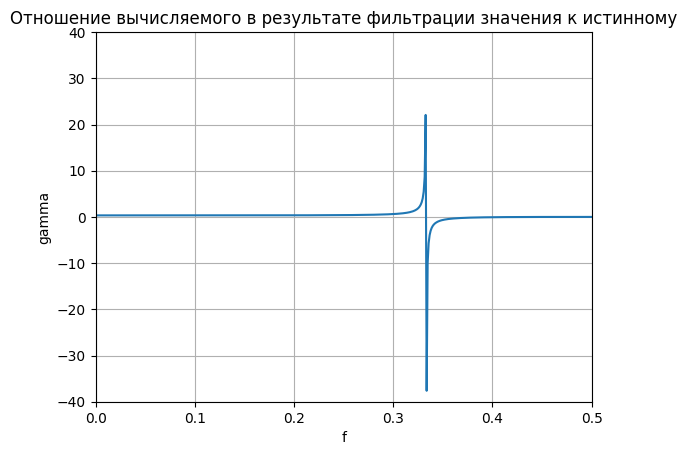

In [45]:
def tilde_H_4(f):
    return ((np.cos(3*math.pi*f) + 3*np.cos(math.pi*f)) / (8j*np.sin(3*math.pi*f))).imag

def gamma_4(f):
    return 1/12*(np.cos(3*math.pi*f) + 3*np.cos(math.pi*f))*((3*math.pi*f) / np.sin(3*math.pi*f))

plt.plot(f, tilde_H_4(f))
plt.title('Передаточная функция рекурсивного фильтра для интегрирования "по правилу 3/8"')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.axis((0, 0.5, -20, 20))
plt.grid()
plt.show()

plt.plot(f, gamma_4(f))
plt.title('Отношение вычисляемого в результате фильтрации значения к истинному')
plt.xlabel('f')
plt.ylabel('gamma')
plt.axis((0, 0.5, -40, 40))
plt.grid()
plt.show()

По результатам графиков видно, что на частоте ~0,33Гц происходят скачки: сначала сигнал резко увеличивается, а затем стремительно уменьшается. На остальной области частот значения близки к 0.

### Пункт 3.

Сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2:

1. При использовании формулы трапеции и правила 3/8 подавляются высокие частоты.
2. При использовании формул прямоугольников и Симпсона высокие частоты, наоборот, усиливаются. Причем формула Симпсона усиливает частоты быстрее, чем формула прямоугольников.
3. При использовании правила 3/8 происходит 2 скачка резкого возрастания и убывания сигнала, в отличие от использования квадратурных формул, для которых функции гладкие.

## Выводы

В ходе выполнения данной лабораторной работы был проведен анализ частотных характеристик формул численного интегрирования: формулы прямоугольников, трапеций, Симпсона и "по правилу 3/8". Были выведены формулы передаточных функций рекурсивных фильтров, для которых были построены соответствующие графики. Также были построены графики отношений вычисляемого в результате фильтрации значения к истинному. Для полученных результатов был проведен сравнительный анализ.
